# Assignment 4 Part 2 - Effect size, power, and p-values.

First import the libraries you will use, notice we will be calling `numpy` with `np.` notation, and `matplotlib.pyplot` as `plt`. These are conventional ways to call these libraries:

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Practice with synthetic data

First, it is important to know that most random number generators are pseudo-random. Meaning, the random numbers are generated with a seed or initial value, and if you declare this seed at the beginning of your analysis, your randomly generated numbers will be consistent every time your code is ran, giving you reproducible results. In `numpy`'s `random` module, you can declare your random number generator with `seed`, see this answer here for an example: https://stackoverflow.com/a/21494630

There are numerous ways to generate random data, you can check out all the `numpy.random` capabilities here: https://numpy.org/doc/1.16/reference/routines.random.html

For now, we will start with the standard normally distributed data (Gaussians). Start by generating 20 random data points with `numpy`'s `randn`, and visualizing it as a histogram with `matplotlib`'s `hist`: https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.hist.html

Text(0.5, 1.0, 'Histogram of Synthetic Data')

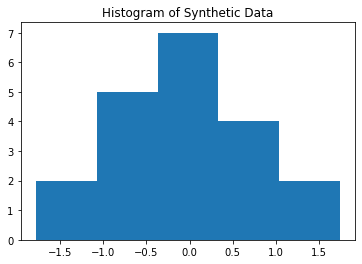

In [2]:
# Pick a random number generator initial seed/value:


# Create a variable that has 20 normally distributed data points. (Use numpy.random.randn)
data = np.random.randn(20)

# Visualize the data you just created with `plt.hist()`. You can tell the histogram to display bin sizes to your liking with `plt.hist(data, bins=#)`. Play around with bin sizes until a decent looking histogram appears.
figure1, axes1 = plt.subplots()     # initialize a figure and axes for drawing
axes1.hist(data, bins = 5)          # Input your data and bins
axes1.set_title('Histogram of Synthetic Data')

A normal (Gaussian) distribution is sufficiently defined by 2 statistics, it's mean and variance. `numpy` has a `mean()` and a `std()` function to compute the mean and standard deviation of your data. Compute the mean and standard deviation of your dataset and use the `print()` function to display the values.

In [4]:
# Compute the mean: 
data_mean = np.mean(data)

# compute the variance: 
data_std = np.std(data)

print('Data mean is ', data_mean)
print('Data standard deviation is ', data_std)

Data mean is  -0.035446258947915824
Data standard deviation is  0.8124713911499953


If you carefully read `randn`'s documentation, you should have known that `randn` samples from a "standard" normal distribution, which has a mean = 0 and standard deviation of 1. Does your `data`'s mean and standard deviation match this expectation of a "standard" normal distribution? If not, why not?

 > Yes, My mean is 0.03 and my standard dev is 0.8 they are both close to 0 and 1. Adding more data points would make them more normally disturbuted. 20 data points is probbaly not enough.

Now instead of 20 data points, replace `data` with 1000 data points from `randn`, display the histogram and compute the mean and variances again:

Data mean is  -0.00677767937329766
Data standard deviation is  1.0260084862444965
My new mean is 0 and my new standard deviation is 1 which is much closer to the normally disturbuted mean and standard deviation


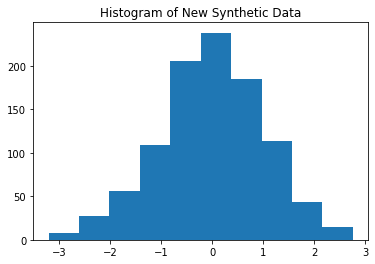

In [8]:
# Seed your Random Number Generator (RNG)

# Replace data with 1000 points:
data = np.random.randn(1000)

# compute and mean and variances, print the answer out like before:
new_mean = np.mean(data)
new_std = np.std(data)

# display the histogram with matplotlib
figure1, axes1 = plt.subplots()     # initialize a figure and axes for drawing
axes1.hist(data, bins = 10)          # Input your data and bins
axes1.set_title('Histogram of New Synthetic Data')

# Does the mean and variances match now?
print('Data mean is ', new_mean)
print('Data standard deviation is ', new_std)

print('My new mean is 0 and my new standard deviation is 1 which is much closer to the normally disturbuted mean and standard deviation')

## A little more realistic scenario.

Now, suppose you are recording the firing rate of neurons pre-treatment and post-treatment. Let's say your treatment is hypothesized to increase the firing rate of neurons. 

From your pilot study, you recorded from a small field of view that has 10 neurons, and your recording software summarized the recording and told you:

 - N = 10 neurons 
 - Pre-treatment data firing rate per second: mean = 150
 - Post-treatment data firing rate per second: mean = 160
 - Both datasets have about the same standard deviation $\sigma^2=30$, and assume normal distribution.

Use `np.random.normal()` to generate your 2 datasets, see docs here: https://numpy.org/doc/1.16/reference/generated/numpy.random.normal.html#numpy.random.normal

 - `np.random.normal` draws samples from a normal distribution, the first input `loc` is the mean of the distribution, the second input `scale` is the standard deviation, and the last is the amount of samples you want to draw. 

In [9]:
# Generate 2 fake datasets according to the pilot study scenario above, do not use a `seed` this time, also no need to plot the histogram:
N  = 10
s2 = 30     # standard deviation is the same for both groups

pre_data  = np.random.normal(loc = 180, scale = s2, size = N)
post_data = np.random.normal(loc = 190, scale = s2, size = N)

After seeing this data, you got very excited and wanted to see if you got your hands on a significant finding, Perform a 2-sampled t-test with `scipy.stats.ttest_ind`, look at the documentations with `?` and plug in your data: 

In [10]:
from scipy.stats import ttest_ind

# Read scipy's t-test implementation docs:
ttest_ind?

Now compute the t-statistics and obtain your p-value:

In [11]:
# perform the t-test:
results = ttest_ind(pre_data, post_data)   # plug in your data

# print output with descriptions:
print("My t-statistic is ", results[0])
print("My p-value is ", results[1])

My t-statistic is  -0.5135676355439464
My p-value is  0.6138007562665169


Since we didn't use a `seed` this time, you can feel free and re-run the data generation cells and the t-test to see how your results change when different random samples are collected.

Should you be using the current output of a 2-tailed p-value for this experiment? Or should you be using a one-tailed p-value? What is your estimated one-tailed p-value? 

 > A two tailed p value is better for this kind of experiment since we're looking at the difference between two groups a pre-treatment and post-treatment group and we don't know if the difference is positive or negative and it's crucial for experiments such as these that look at treatments.

If we are going by the popular stance of $p<0.05$ being significant, is your current t-test's result significant? What are the contributing factors to your p-value? 
 > No my p value is 0.6 which is not significant at all. Things that contribute to a p value are variance in the data set, effect size, as well as sample size. One of the p-hacking tricks i've heard of is that adding a huge sample size can make your p value more significant.

You think that there should be a treatment effect in your current data, so you googled around and found Cohen's D as a metric for effect size, the formula being:

$$
d = \frac{u_1 - u_2}{s}
$$

Where $s$ is the pooled standard deviation for two independent samples:

$$
s = \sqrt{ \frac{SD_1^2 + SD_2^2}{2}}
$$

With $SD_1$ and $SD_2$ being standard deviations for the two samples respectively.

So you set out to compute this metric with the following readily made function:

In [12]:
def cohen_d(a, b):
    """
    Compute effect size with Cohen's D for samples a and b. 
    """
	# calculate the means of the sample
    u1 = np.mean(a)
    u2 = np.mean(b)
    # calculate the simplified pooled variance:
    s = np.sqrt((np.std(a)**2 + np.std(b)**2)/2)
    return (u1 - u2)/s

In [14]:
# Use the above function to compute your effect size:
d = cohen_d(pre_data, post_data)

print("My current effect size is ",d)

My current effect size is  -0.24209810512737726


Is your current effect size large? Use the [Cohen's D Wikipedia page](https://en.wikipedia.org/wiki/Effect_size#Cohen's_d) to judge if you are not too familiar with the metric. What does your $p$-value and $d$ metric say about your current results? Are they reliable? 
 
 > My effect size is very small -0.24 this means not only are my results not significant but my treatment didn't make any difference

Now repeat the above experiment with $N=40$ while everything else is the same:

In [15]:
N = 40      # New sample size

# Generate your data:
s2 = 30 # I used the same deviation for this one as the previous set
pre_data = np.random.normal(loc = 180, scale = s2, size = N)
post_data = np.random.normal(loc = 190, scale = s2, size = N)
# Compute the T-statistic:
new_results = ttest_ind(pre_data, post_data)   # plug in your data
# Compute the Cohen's D:
new_d = cohen_d(pre_data, post_data)

# Print out your answers:
print("My t-statistic is ", new_results[0])
print("My p-value is ", new_results[1])
print("My current effect size is ", new_d)

My t-statistic is  -1.44717376555436
My p-value is  0.15185544949775362
My current effect size is  -0.3277203238307514


You should re-execute the above code cell for multiple trials of your experiment, you should be seeing a lot of different results because the variance in your data. 

What conclusions can you draw about the relationship of sample size and $p$-value? Why should you report effect size in addition to $p$-values?
 
 > P-value decreases as sample size increases, it's one way people p-hack their experiments. Effect size is important in scenarios like these because it shows how much of a difference the treatment had. P value only referes to the set values you've given it but effect size can give you a general sense of whether or not the treatment had an effect.

## Power & P-Hacking:

P-hacking is where scientists try to achieve a significant result by increasing the sample size. In the following for-loop, we are dealing with data that's normally distributed with a small effect size (variance of 2, but difference in mean is only 1). 

Run this code with different sample sizes (N), and see how the output changes, don't be shy with N, you can go crazy high, but something as high as 500,000 might take a minute or two to run. 

In [43]:
N = 82

count_significant = 0   # start with 0 count
ntrials = 1000          # repeat the loop 1000 times
for i in range(ntrials):
    # Generate data
    a = np.random.normal(1,2,N)
    b = np.random.normal(0,2,N)

    # Compute statistics
    result = ttest_ind(a,b)

    # If pvalue < 0.05, count it.
    if result[1] < 0.05:
        count_significant += 1

print('The t-test was significant {}% of the time'.format((count_significant/ntrials)*100))

The t-test was significant 89.7% of the time


The $p$-value is supposed to indicate your chances of getting a false positive result. On the other hand, the probability of your statistical test receiving a $p-value$ below a threshold is your statistical power (0.05 in this case). At what sample size (N) did you start seeing significant results more than 5% of the time? 20%? 50%? ~90%? 

 > N=2 gives me a significance of 7%, for 20% of the time it's at N=12, N=33 gives me around 50%, N=82 gives me around 90%